# RECITATION 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### QUESTION 1

 #### Plotting first signal

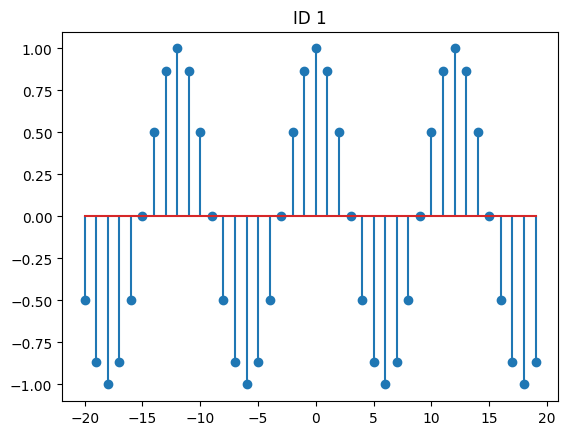

In [2]:
n = np.arange(-20,20)
# A * cos (n*omega + phi)
y1 = np.cos(n*np.pi/6)
plt.figure("Question 1")
plt.stem(n,y1)
plt.title("ID 1")
plt.show()

#### Subplots

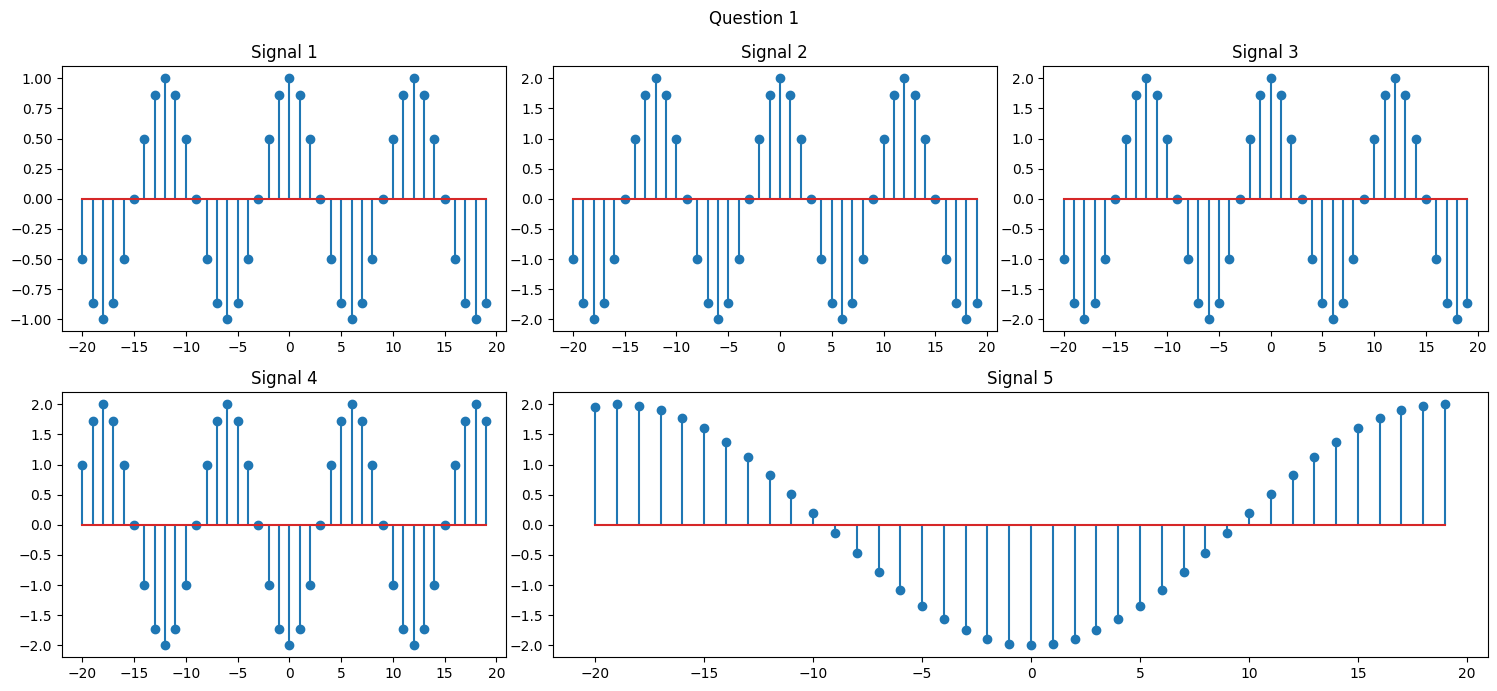

In [3]:
# Signals
y1 = np.cos(n*np.pi/6 + 0)
y2 = 2*np.cos(n*np.pi/6 + 0)
y3 = 2*np.cos(n*np.pi/6 + 4*np.pi)
y4 = 2*np.cos(n*np.pi/6 + np.pi)
y5 = 2*np.cos(n*1/6 + np.pi)

# Create figure
# https://python-course.eu/numerical-programming/gridspec-in-matplotlib.php
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_and_subplots.html
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
# Alternative way to change plot size
# fig.set_figheight(15)
# fig.set_figwidth(15)

gs = ax[1, 2].get_gridspec()
# remove the underlying axes
for a in ax[1, 1:]:
    a.remove()
axbig = fig.add_subplot(gs[1, 1:])

# Draw signals
ax[0,0].stem(n, y1)
ax[0,1].stem(n, y2)
ax[0,2].stem(n, y3)
ax[1,0].stem(n, y4)
axbig.stem(n, y5)

# Write titles
ax[0,0].set_title("Signal 1")
ax[0,1].set_title("Signal 2")
ax[0,2].set_title("Signal 3")
ax[1,0].set_title("Signal 4")
axbig.set_title("Signal 5")

fig.suptitle("Question 1")

# Tighten the layout
fig.tight_layout()

plt.show()

### QUESTION 2

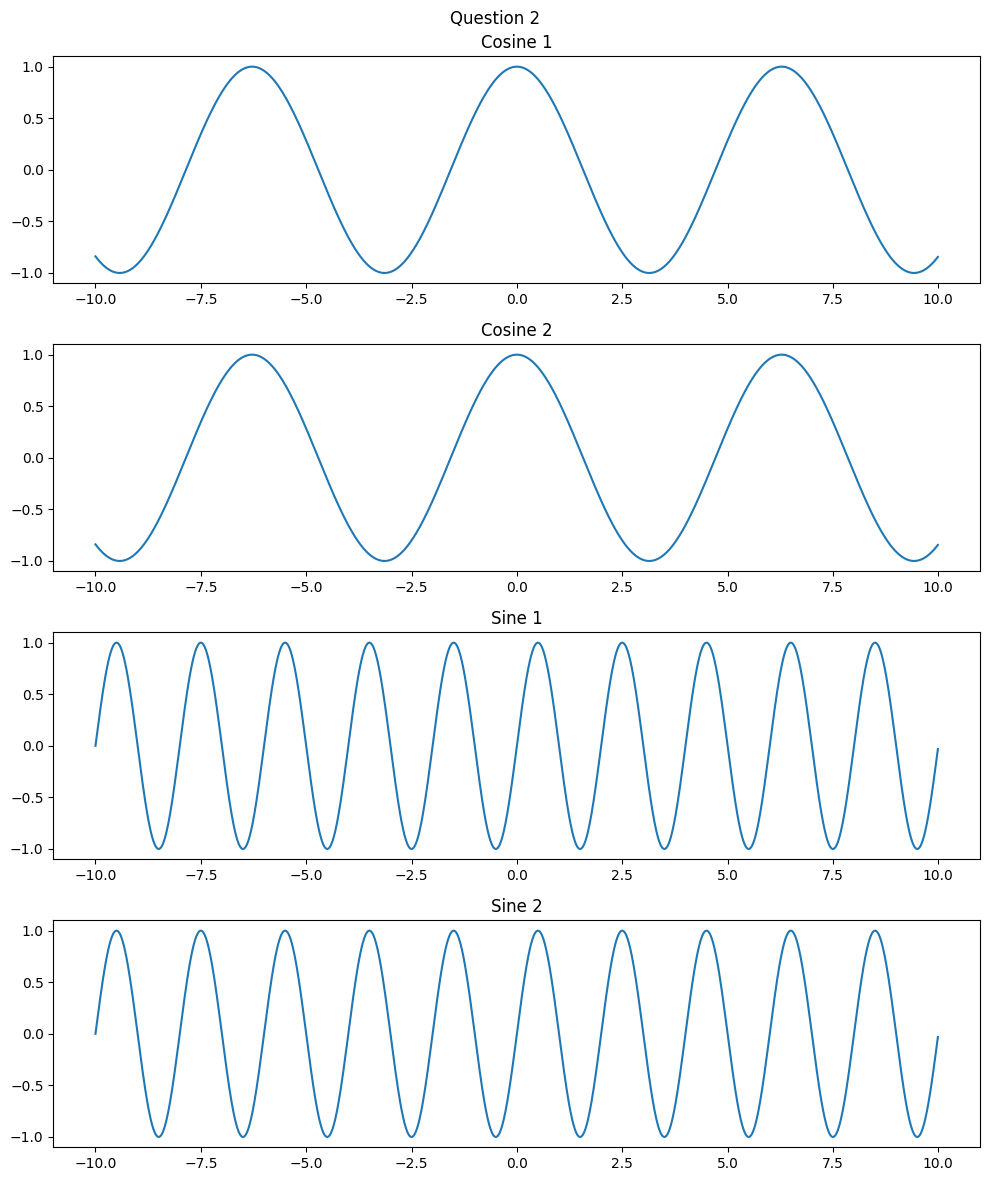

In [4]:
## Time
t = np.arange(-10,10,0.01)
## Cosine
c1 = np.cos(t)
c1_T = np.cos(t+2*np.pi)
## Sine
s1 = np.sin(t*np.pi)
s1_T = np.sin((t+2)*np.pi)

# Create figure
fig, ax = plt.subplots(4, 1, figsize=(10, 12))

# Draw signals
ax[0].plot(t,c1)
ax[1].plot(t,c1_T)
ax[2].plot(t,s1)
ax[3].plot(t,s1_T)

# Write titles
ax[0].set_title("Cosine 1")
ax[1].set_title("Cosine 2")
ax[2].set_title("Sine 1")
ax[3].set_title("Sine 2")

fig.suptitle("Question 2")

# Tighten the layout
fig.tight_layout()

plt.show()

### QUESTION 3

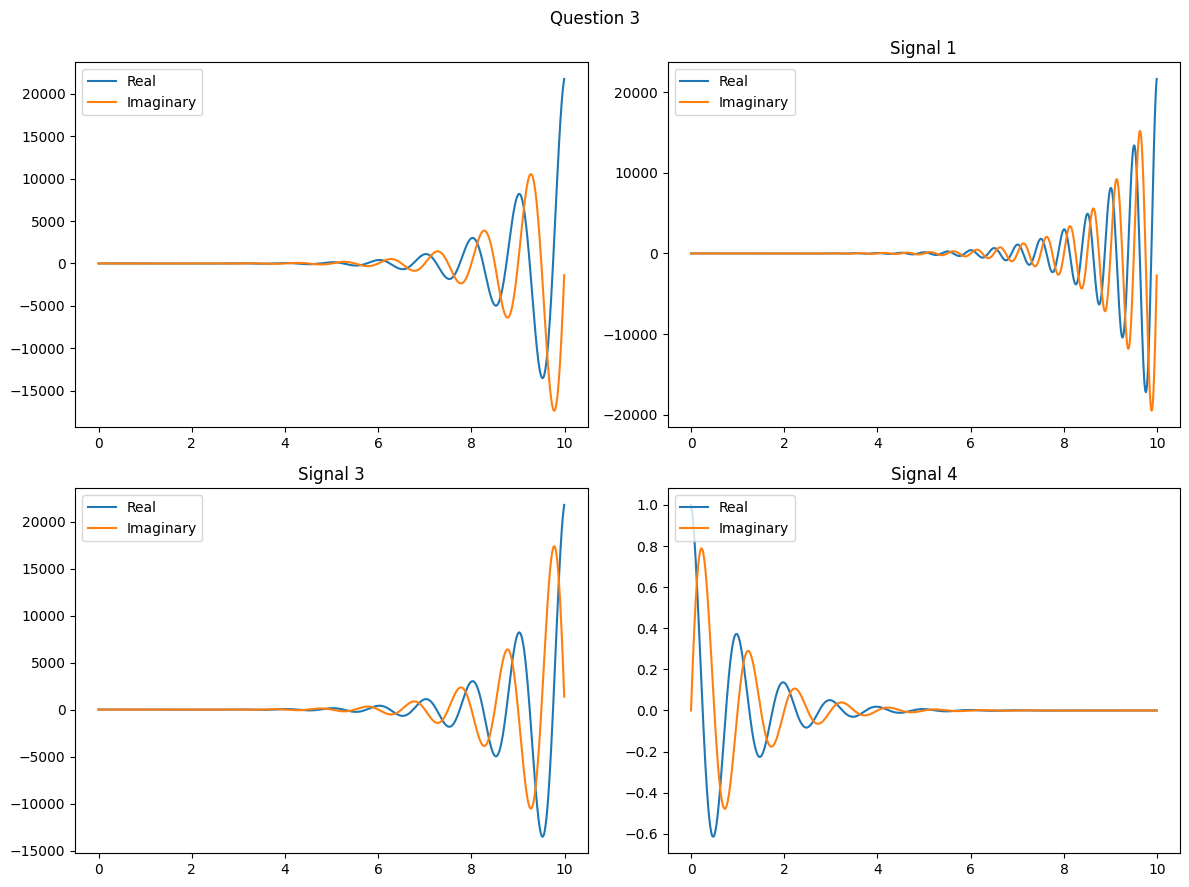

In [5]:
## Time
t = np.arange(0,10,0.01)

# Signal 1
C1 = 1*np.exp(1j*2*np.pi)
r1 = 1
w0_1 = 2*np.pi
a1 = r1+1j*w0_1
s1 = C1*np.exp(a1*t) 
# Signal 2
C2 = 1*np.exp(1j*2*np.pi)
r2 = 1
w0_2 = 4*np.pi
a2 = r2+1j*w0_2
s2 = C2*np.exp(a2*t) 
# Signal 3
C3 = 1*np.exp(1j*2*np.pi)
r3 = 1
w0_3 = -2*np.pi
a3 = r3+1j*w0_3
s3 = C3*np.exp(a3*t) 
# Signal 4
C4 = 1*np.exp(1j*2*np.pi)
r4 = -1
w0_4 = 2*np.pi
a4 = r4+1j*w0_4
s4 = C4*np.exp(a4*t) 


# Create figure
fig, ax = plt.subplots(2,  2, figsize=(12, 9))

# Draw signals
ax[0,0].plot(t,np.real(s1),label="Real")
ax[0,0].plot(t,np.imag(s1),label="Imaginary")
ax[0,1].plot(t,np.real(s2),label="Real")
ax[0,1].plot(t,np.imag(s2),label="Imaginary")
ax[1,0].plot(t,np.real(s3),label="Real")
ax[1,0].plot(t,np.imag(s3),label="Imaginary")
ax[1,1].plot(t,np.real(s4),label="Real")
ax[1,1].plot(t,np.imag(s4),label="Imaginary")


# Write titles
ax[0,1].set_title("Signal 1")
ax[1,1].set_title("Signal 2")
ax[1,0].set_title("Signal 3")
ax[1,1].set_title("Signal 4")

fig.suptitle("Question 3")

# Add legends
for i in ax:
    for j in i:
        j.legend(loc='upper left')

# Tighten the layout
fig.tight_layout()

plt.show()

### QUESTION 4

In [6]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html
from scipy.io import wavfile
sf, data = wavfile.read("youshallnotpass.wav")
print(type(sf), type(data), data.dtype)
# This file is mono channel, therefore we only get one channel data
print("Sampling Frequency = {} , data shape = {}, Length = {}".format(sf, data.shape, data.shape[0] / sf))
# Scale data to between [-1,1] 
scaled_data = data/32768

<class 'int'> <class 'numpy.ndarray'> int16
Sampling Frequency = 48000 , data shape = (226608,), Length = 4.721


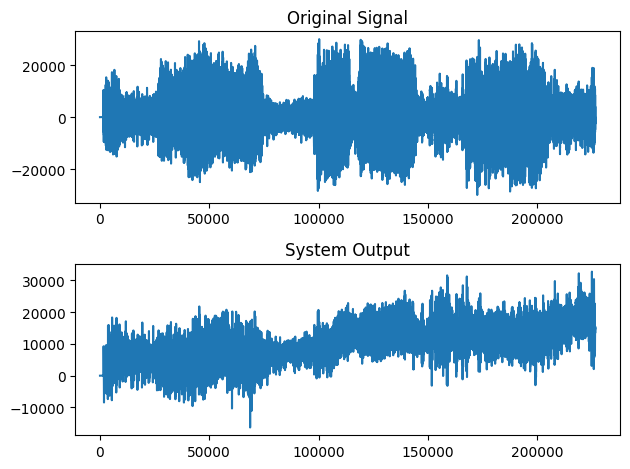

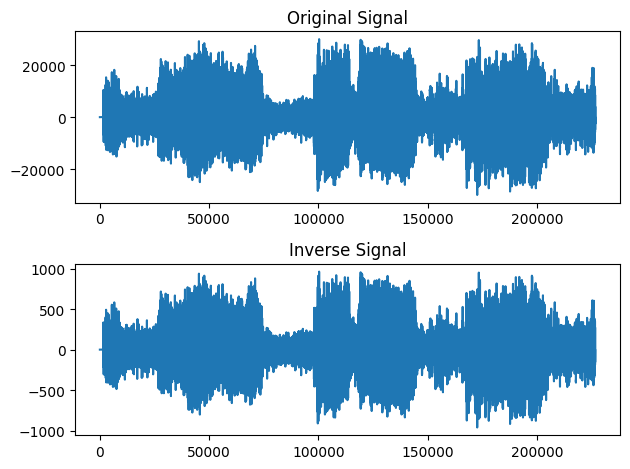

In [7]:
# Forward System
y_2 = scaled_data.copy()
for idx in range(1,len(scaled_data)):
    y_2[idx] = y_2[idx-1] + y_2[idx] 

wavfile.write('system_output.wav',sf, np.int16(y_2/np.max(np.abs(y_2)) * 32767))

plt.subplot(2,1,1)
plt.plot(np.arange(scaled_data.shape[0]), data)
plt.title("Original Signal")

plt.subplot(2,1,2)
plt.plot(np.arange(scaled_data.shape[0]), np.int16(y_2/np.max(np.abs(y_2)) * 32767))
plt.title("System Output")
plt.tight_layout()
plt.show()

sf_system2, data_system2 = wavfile.read("system_output.wav")

# Inverse System
y2_inverse = np.zeros_like(data_system2)
for idx in range(1,len(data_system2)):
    y2_inverse[idx] = data_system2[idx] - data_system2[idx-1]; 

wavfile.write('system_output_inverse.wav',sf_system2, y2_inverse)

plt.subplot(2,1,1)
plt.plot(np.arange(data.shape[0]), data)
plt.title("Original Signal")

plt.subplot(2,1,2)
plt.plot(np.arange(y2_inverse.shape[0]), y2_inverse)
plt.title("Inverse Signal")
plt.tight_layout()
plt.show()